# Introduction to Tensorflow

Tensorflow is on of the main libraries for **Deep Learning**. Deep learning is a subfield of machine learning that is a set of algorithms that is inspired by the structure and function of the brain. Several libraries have been developped to support deep learning which include:

- **Tensorflow**: Free and open-source software library for dataflow and differentiable programming across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks. Created by the **Google Brain team**, it uses Python to provide a convenient front-end API for building applications with the framework, while executing those applications in high-performance C++.

- **PyTorch**: Open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing. It is primarily developed by **Facebook's artificial intelligence** research group. Although the Python interface is more polished and the primary focus of development, PyTorch also has a C++ frontend.

- **Theano**: Python framework developed by the LISA group (now MILA) run by Yoshua Bengio at the **University of Montreal** for research and development into state of the art deep learning algorithms. Developpend has stopped and Theano 1.0 is the last main release(15th of November, 2017). I don't recommend using it as you will lack any further support.

Now that we know more about the main libraries available, let's see more about tensorflow.

TensorFlow is the 2nd learning framework that Google created and used to design, build, and train deep learning models. You can use the TensorFlow library do to numerical computations, which in itself doesn’t seem all too special, but these computations are done with data flow graphs. In these graphs, nodes represent mathematical operations, while the edges represent the data, which usually are multidimensional data arrays or tensors, that are communicated between these edges.


In [1]:
import numpy as np
import tensorflow as tf
print(f"Version: {tf.__version__}")

Version: 2.0.0


In [2]:
# Definitions: Constants, operations...
# Tensor constants:
a = tf.constant(3)
b = tf.constant(5)
c = tf.constant(7)

# Tensor operations: Tensors also support python operators (+, *, ...)
add = tf.add(a, b)
sub = tf.subtract(a, b)
mul = tf.multiply(a, b)
div = tf.divide(a, b)

# Access tensors values:
print(f"add = {add.numpy()}")
print(f"sub = {sub.numpy()}")
print(f"mul = {mul.numpy()}")
print(f"div = {div.numpy()}")

add = 8
sub = -2
mul = 15
div = 0.6


In [3]:
# Other operations:
mean = tf.reduce_mean([a, b, c])
sum = tf.reduce_sum([a, b, c])

# Check tensors values:
print(f"mean = {mean.numpy()}")
print(f"sum = {sum.numpy()}")

# Matrix multiplications.
matrix1 = tf.constant([[1., 2.], [3., 4.]])
matrix2 = tf.constant([[5., 6.], [7., 8.]])

product = tf.matmul(matrix1, matrix2)
print(f"Pruduct: \n{product}")

mean = 5
sum = 15
Pruduct: 
[[19. 22.]
 [43. 50.]]


In [4]:
# Converting the Tensor to Numpy.
product.numpy()

array([[19., 22.],
       [43., 50.]], dtype=float32)

## TensorFlow's Eager API

As mentioned, tensorflow is a symbolic math library with many internal optimizations when the model compiles. But for that we require to first define and compile the model. In sorts, because during the definition of the model everything is still symbolic it does not help the testing during the development as we need to evaluate the symbolic definitions every time we require a validation. To solve that and make it easier to develop the models we can use the *eager API*.

Eager execution is an imperative, define-by-run interface. It forces operations to be executed immediately.

The result is that it makes easier to work with when you first approach Tensorflow and makes research and development more intuitive. A vast majority of the TensorFlow API remains the same so the exact same code that constructs TensorFlow graphs can be executed imperatively by using eager execution. Afterwards most models written with *Eager API* enabled can be converted to a graph that can be further optimized and/or extracted for deployment in production without changing code.

Eager execution provides:

- An intuitive interface: Structure your code naturally and use Python data structures. Quickly iterate on small models and small data.
- Easier debugging: Call ops directly to inspect running models and test changes. Use standard Python debugging tools for immediate error reporting.
- Natural control flow: Use Python control flow instead of graph control flow, simplifying the specification of dynamic models.

In [5]:
# Eager API: Eager execution is enabled by default in TF 2.0 Therefore we need not enable it explicitly.
# If you're in a previous version, you may have to do:   tf.enable_eager_execution()
tf.executing_eagerly()

True

In [6]:
# Define constant tensors
print("Define constant tensors")
a = tf.constant(3)
print("a = %i" % a)
b = tf.constant(5)
print("b = %i" % b)

# Run the operation without the need for tf.Session
print("Running operations, without tf.Session")
c = a + b
print(f"a + b = {c}")
d = a * b
print(f"a * b = {d}")

x = [[2.]]
m = tf.matmul(x, x)
print(f"x^2: {m}")

Define constant tensors
a = 3
b = 5
Running operations, without tf.Session
a + b = 8
a * b = 15
x^2: [[4.]]


In [7]:
# Compatible with Numpy
print("Mixing operations with Tensors and Numpy Arrays")

# Define constant tensors
a = tf.constant([[2., 1.], [1., 0.]], dtype=tf.float32)
print("Tensor:\n a = %s" % a)
b = np.array([[3., 0.], [5., 1.]], dtype=np.float32)
print("NumpyArray:\n b = %s" % b)

# Run the operation without the need for tf.Session
print("Run operations without tf.Session")
d = tf.matmul(a, b)
print("a * b = %s" % d)

Mixing operations with Tensors and Numpy Arrays
Tensor:
 a = tf.Tensor(
[[2. 1.]
 [1. 0.]], shape=(2, 2), dtype=float32)
NumpyArray:
 b = [[3. 0.]
 [5. 1.]]
Run operations without tf.Session
a * b = tf.Tensor(
[[11.  1.]
 [ 3.  0.]], shape=(2, 2), dtype=float32)


In [8]:
print("Iterate through Tensor 'a':")
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        print(a[i][j])

Iterate through Tensor 'a':
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


In [9]:
a = tf.constant([[1, 2],
                 [3, 4]])
# Broadcasting support
b = tf.add(a, 1)
print(b)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [10]:
# Operator overloading is supported
print(a * b)

tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


## Example of a model

Creating a multi-layer model that classifies the standard MNIST handwritten digits is simple and it shows the optimizer and layer APIs to build trainable graphs in an eager execution environment.

In [11]:
# Fetch and format the MNIST dataset:
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(mnist_images[..., tf.newaxis]/255, tf.float32),
     tf.cast(mnist_labels,tf.int64)))
dataset = dataset.shuffle(1000).batch(32)

In [12]:
# Build model
mnist_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, [3,3], activation='relu',
                           input_shape=(None, None, 1)),
    tf.keras.layers.Conv2D(16, [3,3], activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10)
])

In [13]:
# Call the model and inspect the output in eager execution even without training:
for images,labels in dataset.take(1):
    print("Logits: ", mnist_model(images[0:1]).numpy())

Logits:  [[ 0.06870792 -0.03636379 -0.01621683 -0.10504977 -0.12354497  0.00580315
   0.01426385 -0.05661091  0.04829357 -0.00552651]]


In [14]:
# Define optimizer and loss:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_history = []

In [15]:
def train_step(images, labels):
    with tf.GradientTape() as tape:
        logits = mnist_model(images, training=True)
    
        # Add asserts to check the shape of the output.
        tf.debugging.assert_equal(logits.shape, (32, 10))
    
        loss_value = loss_object(labels, logits)

    loss_history.append(loss_value.numpy().mean())
    grads = tape.gradient(loss_value, mnist_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables))

def train():
    for epoch in range(3):
        for (batch, (images, labels)) in enumerate(dataset):
            train_step(images, labels)
        print (f"Epoch {epoch} finished")

In [16]:
train()

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished


Text(0, 0.5, 'Loss [entropy]')

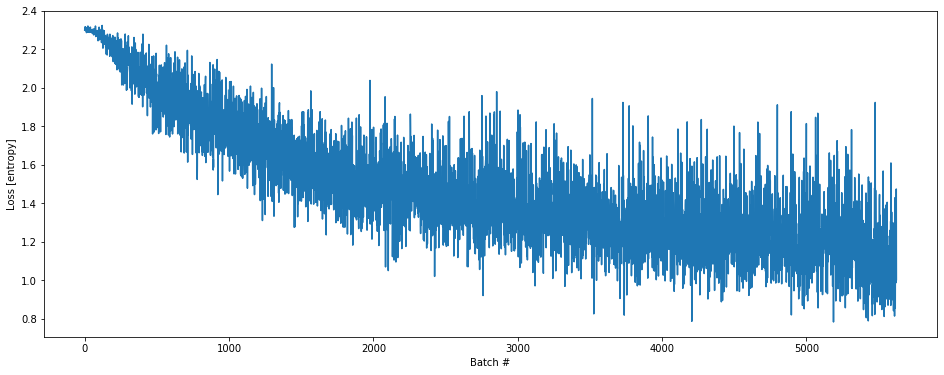

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.plot(loss_history)
plt.xlabel('Batch #')
plt.ylabel('Loss [entropy]')

More about using deep learning in:
- Intro
    - 04_MNIST_Handwritten_Digit_Classification.ipynb
- Computer Vision